**Problem Statement:**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?


In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [ ]:
files.upload()

Saving train-chennai-sale.csv to train-chennai-sale.csv


{'train-chennai-sale.csv': b'PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE\r\nP03210,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4,3.9,4.9,4.33,380000,144400,7600000\r\nP09411,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770\r\nP01812,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.09,421094,92114,13159200\r\nP05346,Velachery,1855,13-03-2010,14,3,2,5,Family,No,18-03-1988,Others,NoSewr ,Paved,I,4.7,3.9,3.6,4.01,356321,77042,9630290\r\nP06210,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3,2.5,4.1,3.29,237000,74063,7406250\r\nP00219,Chrompet,1220,11-09-2014,36,2,1,4,Partial,No,12-09-2009,Commercial,NoSeWa,No Access,RH,4.5,2

In [ ]:
df=pd.read_csv('train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# ***Data Cleaning***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
# Droping row where no of bedrooms is NA
df=df.dropna(subset=['N_BEDROOM'])

In [ ]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
df['N_BATHROOM'].describe()

count    7103.00000
mean        1.21329
std         0.40966
min         1.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         2.00000
Name: N_BATHROOM, dtype: float64

In [ ]:
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0])

In [ ]:
df.N_BATHROOM.isna().sum()

0

In [ ]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
df['QS_OVERALL'].describe()

count    7060.000000
mean        3.503303
std         0.527244
min         2.000000
25%         3.130000
50%         3.500000
75%         3.890000
max         4.970000
Name: QS_OVERALL, dtype: float64

In [ ]:
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())
df.isna().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [ ]:
df=df.drop(['PRT_ID'],axis=1)
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [ ]:
df.AREA.describe()

count         7108
unique          17
top       Chrompet
freq          1681
Name: AREA, dtype: object

In [ ]:
sorted(df.AREA.unique())

['Adyar',
 'Adyr',
 'Ana Nagar',
 'Ann Nagar',
 'Anna Nagar',
 'Chormpet',
 'Chrmpet',
 'Chrompet',
 'Chrompt',
 'KK Nagar',
 'KKNagar',
 'Karapakam',
 'Karapakkam',
 'T Nagar',
 'TNagar',
 'Velachery',
 'Velchery']

In [ ]:
df['AREA']=df['AREA'].replace(['Adyr'],'Adyar')
df['AREA']=df['AREA'].replace(['Ana Nagar','Ann Nagar'],'Anna Nagar')
df['AREA']=df['AREA'].replace(['Chormpet','Chrmpet','Chrompet','Chrompt',],'chromepet')
df['AREA']=df['AREA'].replace(['KKNagar'],'KK Nagar')
df['AREA']=df['AREA'].replace(['Karapakam'],'Karapakkam')
df['AREA']=df['AREA'].replace(['TNagar'],'T Nagar')
df['AREA']=df['AREA'].replace(['Velchery'],'Velachery')
sorted(df.AREA.unique())

['Adyar',
 'Anna Nagar',
 'KK Nagar',
 'Karapakkam',
 'T Nagar',
 'Velachery',
 'chromepet']

In [ ]:
df['AREA']=df['AREA'].str.lower()
sorted(df.AREA.unique())

['adyar',
 'anna nagar',
 'chromepet',
 'karapakkam',
 'kk nagar',
 't nagar',
 'velachery']

In [ ]:
df['DATE_SALE']=pd.DatetimeIndex(df['DATE_SALE']).year
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,karapakkam,1004,2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,anna nagar,1986,2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,adyar,909,2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,velachery,1855,2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,karapakkam,1226,2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
df['INT_SQFT'].describe()

count    7108.000000
mean     1382.048537
std       457.438429
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [ ]:
df['INT_SQFT']=df['INT_SQFT'].astype('int64')
df.N_BEDROOM=df.N_BEDROOM.astype('int')
df.N_BATHROOM=df.N_BATHROOM.astype('int')
df.QS_ROOMS=df.QS_ROOMS.astype('int')
df.QS_BATHROOM=df.QS_BATHROOM.astype('int')
df.QS_BEDROOM=df.QS_BEDROOM.astype('int')
df.QS_OVERALL=df.QS_OVERALL.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7108 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AREA           7108 non-null   object
 1   INT_SQFT       7108 non-null   int64 
 2   DATE_SALE      7108 non-null   int64 
 3   DIST_MAINROAD  7108 non-null   int64 
 4   N_BEDROOM      7108 non-null   int64 
 5   N_BATHROOM     7108 non-null   int64 
 6   N_ROOM         7108 non-null   int64 
 7   SALE_COND      7108 non-null   object
 8   PARK_FACIL     7108 non-null   object
 9   DATE_BUILD     7108 non-null   object
 10  BUILDTYPE      7108 non-null   object
 11  UTILITY_AVAIL  7108 non-null   object
 12  STREET         7108 non-null   object
 13  MZZONE         7108 non-null   object
 14  QS_ROOMS       7108 non-null   int64 
 15  QS_BATHROOM    7108 non-null   int64 
 16  QS_BEDROOM     7108 non-null   int64 
 17  QS_OVERALL     7108 non-null   int64 
 18  REG_FEE        7108 non-null

In [ ]:
sorted(df.SALE_COND.unique())

['Ab Normal',
 'AbNormal',
 'Adj Land',
 'AdjLand',
 'Family',
 'Normal Sale',
 'PartiaLl',
 'Partial',
 'Partiall']

In [ ]:
df['SALE_COND']=df['SALE_COND'].replace(['Ab Normal'],'AbNormal')
df['SALE_COND']=df['SALE_COND'].replace(['Adj Land'],'AdjLand')
df['SALE_COND']=df['SALE_COND'].replace(['PartiaLl','Partiall'],'Partial')
sorted(df.SALE_COND.unique())

['AbNormal', 'AdjLand', 'Family', 'Normal Sale', 'Partial']

In [ ]:
df['SALE_COND']=df['SALE_COND'].str.lower()
sorted(df.SALE_COND.unique())

['abnormal', 'adjland', 'family', 'normal sale', 'partial']

In [ ]:
sorted(df.PARK_FACIL.unique())

['No', 'Noo', 'Yes']

In [ ]:
df['PARK_FACIL']=df['PARK_FACIL'].replace(['Noo'],'No')
sorted(df.PARK_FACIL.unique())

['No', 'Yes']

In [ ]:
df['PARK_FACIL']=df['PARK_FACIL'].str.lower()
sorted(df.PARK_FACIL.unique())

['no', 'yes']

In [ ]:
df['DATE_BUILD']=pd.DatetimeIndex(df['DATE_BUILD']).year
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,karapakkam,1004,2011,131,1,1,3,abnormal,yes,1967,Commercial,AllPub,Paved,A,4,3,4,4,380000,144400,7600000
1,anna nagar,1986,2006,26,2,1,5,abnormal,no,1995,Commercial,AllPub,Gravel,RH,4,4,2,3,760122,304049,21717770
2,adyar,909,2012,70,1,1,3,abnormal,yes,1992,Commercial,ELO,Gravel,RL,4,3,2,3,421094,92114,13159200
3,velachery,1855,2010,14,3,2,5,family,no,1988,Others,NoSewr,Paved,I,4,3,3,4,356321,77042,9630290
4,karapakkam,1226,2009,84,1,1,3,abnormal,yes,1979,Others,AllPub,Gravel,C,3,2,4,3,237000,74063,7406250


In [ ]:
sorted(df.BUILDTYPE.unique())

['Comercial', 'Commercial', 'House', 'Other', 'Others']

In [ ]:
df['BUILDTYPE']=df['BUILDTYPE'].replace(['Comercial'],'Commercial')
df['BUILDTYPE']=df['BUILDTYPE'].replace(['Other'],'Others')
sorted(df.BUILDTYPE.unique())

['Commercial', 'House', 'Others']

In [ ]:
df['BUILDTYPE']=df['BUILDTYPE'].str.lower()
sorted(df.BUILDTYPE.unique())

['commercial', 'house', 'others']

In [ ]:
sorted(df.UTILITY_AVAIL.unique())

['All Pub', 'AllPub', 'ELO', 'NoSeWa', 'NoSewr ']

In [ ]:
# Trim
df.UTILITY_AVAIL=df.UTILITY_AVAIL.str.strip()
sorted(df.UTILITY_AVAIL.unique())

['All Pub', 'AllPub', 'ELO', 'NoSeWa', 'NoSewr']

In [ ]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace(['All Pub'],'AllPub')
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace(['NoSewr'],'NoSeWa')
sorted(df.UTILITY_AVAIL.unique())

['AllPub', 'ELO', 'NoSeWa']

In [ ]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].str.lower()
sorted(df.UTILITY_AVAIL.unique())

['allpub', 'elo', 'nosewa']

In [ ]:
sorted(df.STREET.unique())

['Gravel', 'No Access', 'NoAccess', 'Pavd', 'Paved']

In [ ]:
df['STREET']=df['STREET'].replace(['No Access'],'NoAccess')
df['STREET']=df['STREET'].replace(['Pavd'],'Paved')
sorted(df.STREET.unique())

['Gravel', 'NoAccess', 'Paved']

In [ ]:
df['STREET']=df['STREET'].str.lower()
sorted(df.STREET.unique())

['gravel', 'noaccess', 'paved']

In [ ]:
sorted(df.MZZONE.unique())

['A', 'C', 'I', 'RH', 'RL', 'RM']

In [ ]:
df['MZZONE']=df['MZZONE'].str.lower()
sorted(df.MZZONE.unique())

['a', 'c', 'i', 'rh', 'rl', 'rm']

In [ ]:
df=df.drop(['REG_FEE','COMMIS'],axis=1)
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

In [ ]:
df['BUILDING AGE']=df.DATE_SALE-df.DATE_BUILD

In [ ]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
0,karapakkam,1004,2011,131,1,1,3,abnormal,yes,1967,commercial,allpub,paved,a,4,3,4,4,7600000,44
1,anna nagar,1986,2006,26,2,1,5,abnormal,no,1995,commercial,allpub,gravel,rh,4,4,2,3,21717770,11
2,adyar,909,2012,70,1,1,3,abnormal,yes,1992,commercial,elo,gravel,rl,4,3,2,3,13159200,20
3,velachery,1855,2010,14,3,2,5,family,no,1988,others,nosewa,paved,i,4,3,3,4,9630290,22
4,karapakkam,1226,2009,84,1,1,3,abnormal,yes,1979,others,allpub,gravel,c,3,2,4,3,7406250,30


# ***Don't Open***

In [ ]:
# dummy=df.copy()
# # dummy.info()

In [ ]:
# v=dummy['AREA'].unique()
# v

In [ ]:
# # if df.N_BEDROOM.dtype=="object":
# #   print(True)
# # else:
# #   print(False)
# cols=[]
# for i in dummy.columns:
#   if dummy[i].dtype=="object":
#     cols.append(i)
# cols
# for i in cols:
#   values=dummy[i].unique().tolist()
#   for j in values:
#     dummy[i]=values.index(dummy[i])
# dummy

 ***Correlation***

In [ ]:
# df.corr()

In [ ]:
# heatmap=sns.heatmap(df.corr(),square=True, annot=True, fmt='.2f', linecolor='white')

In [ ]:
# df.corr()

In [ ]:
# df.corr().iloc[[-2]]

# ***Next***

In [ ]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
0,karapakkam,1004,2011,131,1,1,3,abnormal,yes,1967,commercial,allpub,paved,a,4,3,4,4,7600000,44
1,anna nagar,1986,2006,26,2,1,5,abnormal,no,1995,commercial,allpub,gravel,rh,4,4,2,3,21717770,11
2,adyar,909,2012,70,1,1,3,abnormal,yes,1992,commercial,elo,gravel,rl,4,3,2,3,13159200,20
3,velachery,1855,2010,14,3,2,5,family,no,1988,others,nosewa,paved,i,4,3,3,4,9630290,22
4,karapakkam,1226,2009,84,1,1,3,abnormal,yes,1979,others,allpub,gravel,c,3,2,4,3,7406250,30


In [ ]:
x=df.groupby(['AREA']).mean().SALES_PRICE
x

AREA
adyar         9.185668e+06
anna nagar    1.517376e+07
chromepet     1.001381e+07
karapakkam    7.340100e+06
kk nagar      1.269623e+07
t nagar       1.561674e+07
velachery     1.104735e+07
Name: SALES_PRICE, dtype: float64

In [ ]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
0,karapakkam,1004,2011,131,1,1,3,abnormal,yes,1967,commercial,allpub,paved,a,4,3,4,4,7600000,44
1,anna nagar,1986,2006,26,2,1,5,abnormal,no,1995,commercial,allpub,gravel,rh,4,4,2,3,21717770,11
2,adyar,909,2012,70,1,1,3,abnormal,yes,1992,commercial,elo,gravel,rl,4,3,2,3,13159200,20
3,velachery,1855,2010,14,3,2,5,family,no,1988,others,nosewa,paved,i,4,3,3,4,9630290,22
4,karapakkam,1226,2009,84,1,1,3,abnormal,yes,1979,others,allpub,gravel,c,3,2,4,3,7406250,30


In [ ]:
y=sorted(x.items(), key =lambda kv:(kv[1], kv[0]))
y

[('karapakkam', 7340100.109809663),
 ('adyar', 9185668.391472869),
 ('chromepet', 10013809.64747356),
 ('velachery', 11047353.027522936),
 ('kk nagar', 12696228.746238716),
 ('anna nagar', 15173755.158831004),
 ('t nagar', 15616742.59481038)]

In [ ]:
df['AREA']=df['AREA'].replace({"karapakkam":1,"adyar":2,"chromepet":3,"velachery":4,"kk nagar":5,"anna nagar":6,"t nagar":7})
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
0,1,1004,2011,131,1,1,3,abnormal,yes,1967,commercial,allpub,paved,a,4,3,4,4,7600000,44
1,6,1986,2006,26,2,1,5,abnormal,no,1995,commercial,allpub,gravel,rh,4,4,2,3,21717770,11
2,2,909,2012,70,1,1,3,abnormal,yes,1992,commercial,elo,gravel,rl,4,3,2,3,13159200,20
3,4,1855,2010,14,3,2,5,family,no,1988,others,nosewa,paved,i,4,3,3,4,9630290,22
4,1,1226,2009,84,1,1,3,abnormal,yes,1979,others,allpub,gravel,c,3,2,4,3,7406250,30


In [ ]:
df.AREA.unique()

array([1, 6, 2, 4, 3, 5, 7])

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
0,karapakkam,1004,2011,131,1,1,3,abnormal,yes,1967,commercial,allpub,paved,a,4,3,4,4,7600000,44
1,anna nagar,1986,2006,26,2,1,5,abnormal,no,1995,commercial,allpub,gravel,rh,4,4,2,3,21717770,11
2,adyar,909,2012,70,1,1,3,abnormal,yes,1992,commercial,elo,gravel,rl,4,3,2,3,13159200,20
3,velachery,1855,2010,14,3,2,5,family,no,1988,others,nosewa,paved,i,4,3,3,4,9630290,22
4,karapakkam,1226,2009,84,1,1,3,abnormal,yes,1979,others,allpub,gravel,c,3,2,4,3,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,karapakkam,598,2011,51,1,1,2,adjland,no,1962,others,elo,noaccess,rm,3,2,2,2,5353000,49
7105,velachery,1897,2004,52,3,2,5,family,yes,1995,others,nosewa,noaccess,rh,3,4,3,3,10818480,9
7106,velachery,1614,2006,152,2,1,4,normal sale,no,1978,house,nosewa,gravel,i,4,4,2,3,8351410,28
7107,karapakkam,787,2009,40,1,1,2,partial,yes,1977,commercial,elo,paved,rl,4,3,4,4,8507000,32


In [ ]:
x=df.groupby(['SALE_COND']).mean().SALES_PRICE
y=sorted(x.items(), key =lambda kv:(kv[1], kv[0]))
y

[('partial', 10616242.660614526),
 ('family', 10736415.498930862),
 ('abnormal', 10914631.562721474),
 ('normal sale', 10994177.803935347),
 ('adjland', 11209314.975677554)]

In [ ]:
df['SALE_COND']=df['SALE_COND'].replace({"partial":1,"family":2,"abnormal":3,"normal sale":4,"adjland":5})
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
0,1,1004,2011,131,1,1,3,3,yes,1967,commercial,allpub,paved,a,4,3,4,4,7600000,44
1,6,1986,2006,26,2,1,5,3,no,1995,commercial,allpub,gravel,rh,4,4,2,3,21717770,11
2,2,909,2012,70,1,1,3,3,yes,1992,commercial,elo,gravel,rl,4,3,2,3,13159200,20
3,4,1855,2010,14,3,2,5,2,no,1988,others,nosewa,paved,i,4,3,3,4,9630290,22
4,1,1226,2009,84,1,1,3,3,yes,1979,others,allpub,gravel,c,3,2,4,3,7406250,30


In [ ]:
df.SALE_COND.unique()

array([3, 2, 1, 5, 4])

In [ ]:
x=df.groupby(['PARK_FACIL']).mean().SALES_PRICE
y=sorted(x.items(), key =lambda kv:(kv[1], kv[0]))
y

[('no', 10337919.779892076), ('yes', 11441678.084750488)]

In [ ]:
df['PARK_FACIL']=df['PARK_FACIL'].replace({"no":1,"yes":2})
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
0,1,1004,2011,131,1,1,3,3,2,1967,commercial,allpub,paved,a,4,3,4,4,7600000,44
1,6,1986,2006,26,2,1,5,3,1,1995,commercial,allpub,gravel,rh,4,4,2,3,21717770,11
2,2,909,2012,70,1,1,3,3,2,1992,commercial,elo,gravel,rl,4,3,2,3,13159200,20
3,4,1855,2010,14,3,2,5,2,1,1988,others,nosewa,paved,i,4,3,3,4,9630290,22
4,1,1226,2009,84,1,1,3,3,2,1979,others,allpub,gravel,c,3,2,4,3,7406250,30


In [ ]:
df.PARK_FACIL.unique()

array([2, 1])

In [ ]:
x=df.groupby(['BUILDTYPE']).mean().SALES_PRICE
y=sorted(x.items(), key =lambda kv:(kv[1], kv[0]))
y

[('house', 9098151.14817847),
 ('others', 9807998.01583904),
 ('commercial', 13869836.073422069)]

In [ ]:
df['BUILDTYPE']=df['BUILDTYPE'].replace({"house":1,"others":2,"commercial":3})
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
0,1,1004,2011,131,1,1,3,3,2,1967,3,allpub,paved,a,4,3,4,4,7600000,44
1,6,1986,2006,26,2,1,5,3,1,1995,3,allpub,gravel,rh,4,4,2,3,21717770,11
2,2,909,2012,70,1,1,3,3,2,1992,3,elo,gravel,rl,4,3,2,3,13159200,20
3,4,1855,2010,14,3,2,5,2,1,1988,2,nosewa,paved,i,4,3,3,4,9630290,22
4,1,1226,2009,84,1,1,3,3,2,1979,2,allpub,gravel,c,3,2,4,3,7406250,30


In [ ]:
df.BUILDTYPE.unique()

array([3, 2, 1])

In [ ]:
x=df.groupby(['UTILITY_AVAIL']).mean().SALES_PRICE
y=sorted(x.items(), key =lambda kv:(kv[1], kv[0]))
y

[('elo', 10469414.625492772),
 ('nosewa', 10909263.675317653),
 ('allpub', 11210015.601483837)]

In [ ]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace({"elo":1,"nosewa":2,"allpub":3})
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
0,1,1004,2011,131,1,1,3,3,2,1967,3,3,paved,a,4,3,4,4,7600000,44
1,6,1986,2006,26,2,1,5,3,1,1995,3,3,gravel,rh,4,4,2,3,21717770,11
2,2,909,2012,70,1,1,3,3,2,1992,3,1,gravel,rl,4,3,2,3,13159200,20
3,4,1855,2010,14,3,2,5,2,1,1988,2,2,paved,i,4,3,3,4,9630290,22
4,1,1226,2009,84,1,1,3,3,2,1979,2,3,gravel,c,3,2,4,3,7406250,30


In [ ]:
df.UTILITY_AVAIL.unique()

array([3, 1, 2])

In [ ]:
x=df.groupby(['STREET']).mean().SALES_PRICE
y=sorted(x.items(), key =lambda kv:(kv[1], kv[0]))
y

[('noaccess', 10000343.067956349),
 ('paved', 11057536.708786936),
 ('gravel', 11444618.569444444)]

In [ ]:
df['STREET']=df['STREET'].replace({"noaccess":1,"paved":2,"gravel":3})
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
0,1,1004,2011,131,1,1,3,3,2,1967,3,3,2,a,4,3,4,4,7600000,44
1,6,1986,2006,26,2,1,5,3,1,1995,3,3,3,rh,4,4,2,3,21717770,11
2,2,909,2012,70,1,1,3,3,2,1992,3,1,3,rl,4,3,2,3,13159200,20
3,4,1855,2010,14,3,2,5,2,1,1988,2,2,2,i,4,3,3,4,9630290,22
4,1,1226,2009,84,1,1,3,3,2,1979,2,3,3,c,3,2,4,3,7406250,30


In [ ]:
df.STREET.unique()

array([2, 3, 1])

In [ ]:
x=df.groupby(['MZZONE']).mean().SALES_PRICE
y=sorted(x.items(), key =lambda kv:(kv[1], kv[0]))
y

[('a', 7292591.080074488),
 ('c', 8052270.172727273),
 ('i', 8738632.723809524),
 ('rh', 11039971.550493963),
 ('rl', 11765762.54305705),
 ('rm', 12407955.77092511)]

In [ ]:
df['MZZONE']=df['MZZONE'].replace({"a":1,"c":2,"i":3,"rh":4,"rl":5,"rm":6})
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
0,1,1004,2011,131,1,1,3,3,2,1967,3,3,2,1,4,3,4,4,7600000,44
1,6,1986,2006,26,2,1,5,3,1,1995,3,3,3,4,4,4,2,3,21717770,11
2,2,909,2012,70,1,1,3,3,2,1992,3,1,3,5,4,3,2,3,13159200,20
3,4,1855,2010,14,3,2,5,2,1,1988,2,2,2,3,4,3,3,4,9630290,22
4,1,1226,2009,84,1,1,3,3,2,1979,2,3,3,2,3,2,4,3,7406250,30


In [ ]:
df.corr().iloc[[-2]]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
SALES_PRICE,0.69424,0.612133,0.000911,0.018791,0.330999,0.108835,0.602765,0.054373,0.146435,0.116044,0.515765,0.067146,0.149603,0.427831,0.016064,-0.019475,0.015041,0.012567,1.0,-0.118842


In [ ]:
sales_price=df['SALES_PRICE']
sales_price
df=df.drop(['SALES_PRICE'],axis=1)
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,BUILDING AGE
0,1,1004,2011,131,1,1,3,3,2,1967,3,3,2,1,4,3,4,4,44
1,6,1986,2006,26,2,1,5,3,1,1995,3,3,3,4,4,4,2,3,11
2,2,909,2012,70,1,1,3,3,2,1992,3,1,3,5,4,3,2,3,20
3,4,1855,2010,14,3,2,5,2,1,1988,2,2,2,3,4,3,3,4,22
4,1,1226,2009,84,1,1,3,3,2,1979,2,3,3,2,3,2,4,3,30


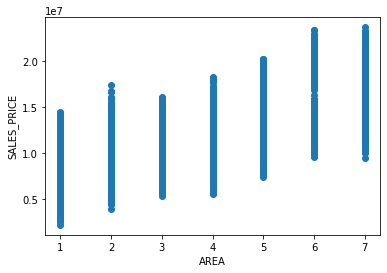

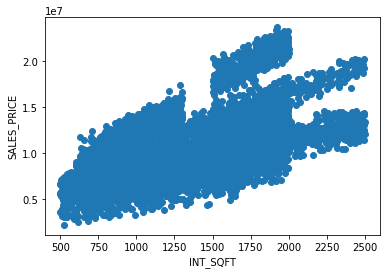

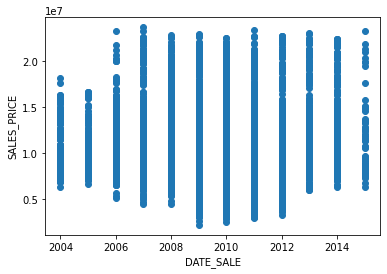

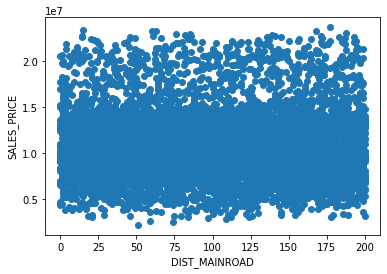

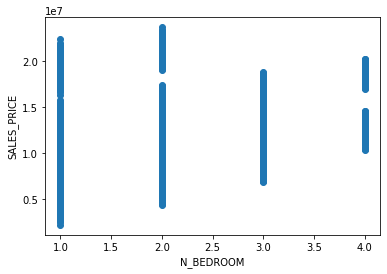

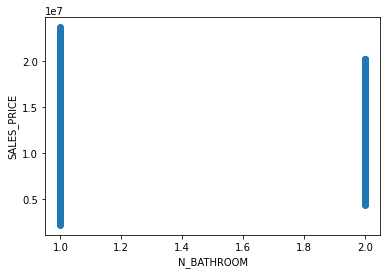

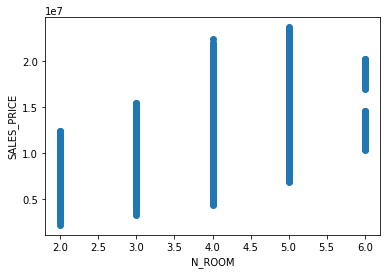

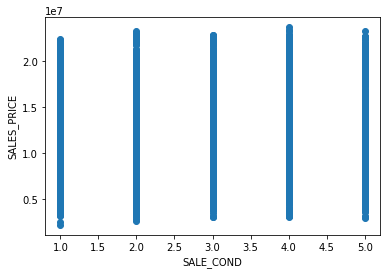

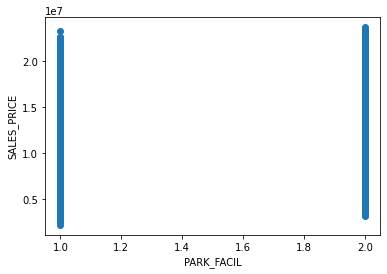

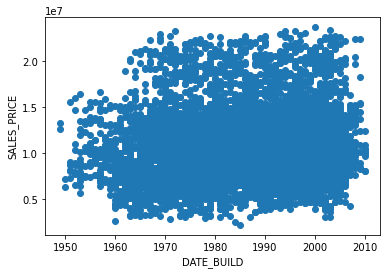

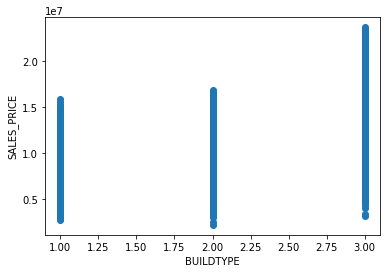

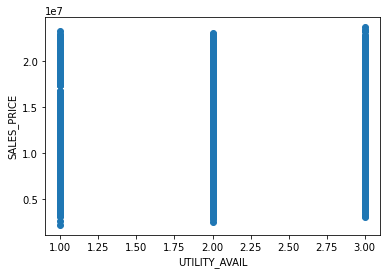

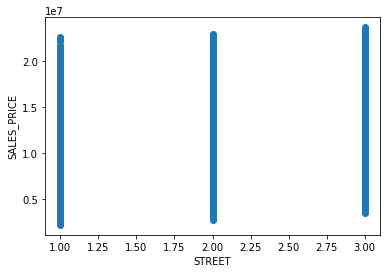

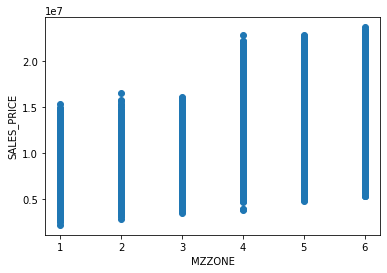

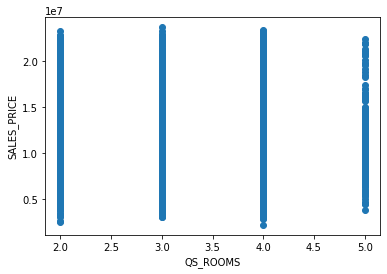

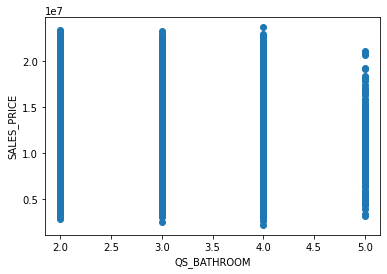

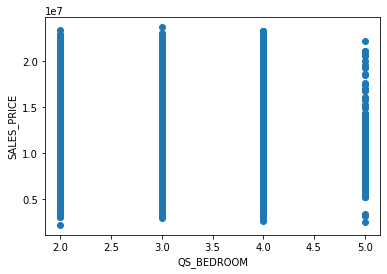

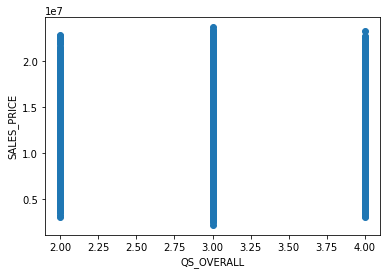

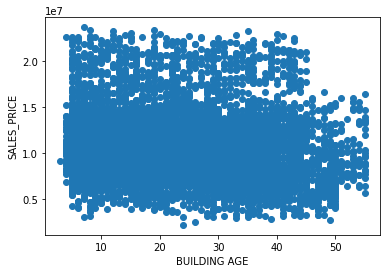

In [ ]:
for i in df.columns:
  plt.scatter(df[i],sales_price)
  plt.xlabel(i)
  plt.ylabel('SALES_PRICE')
  plt.show()

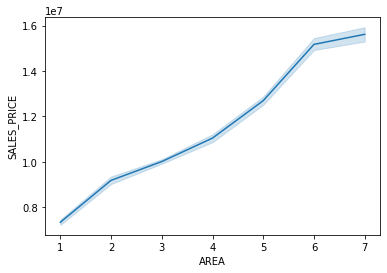

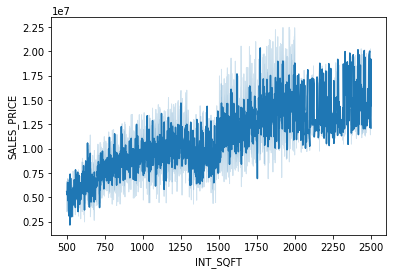

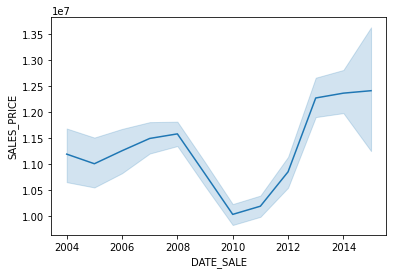

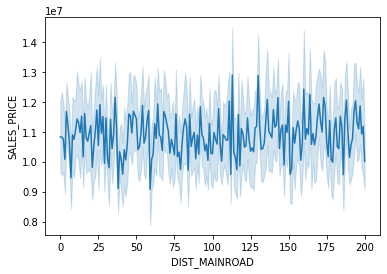

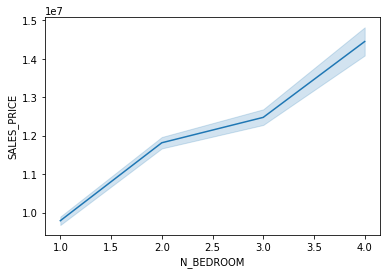

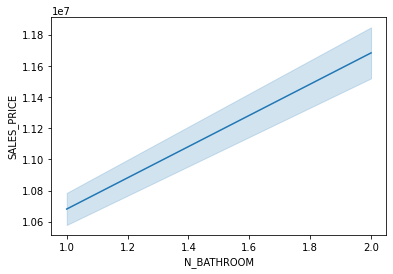

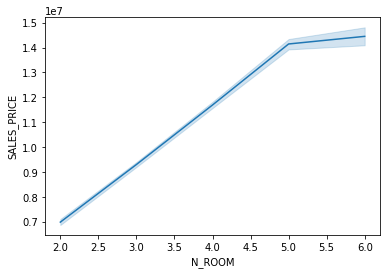

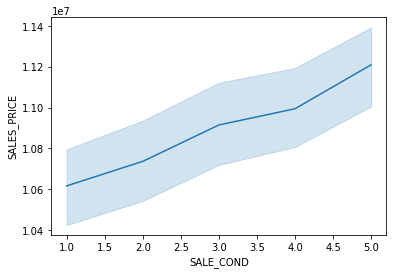

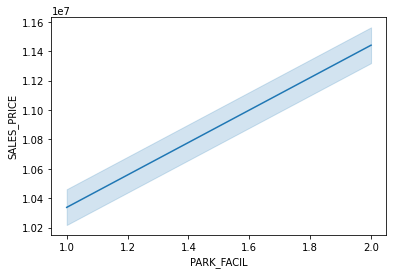

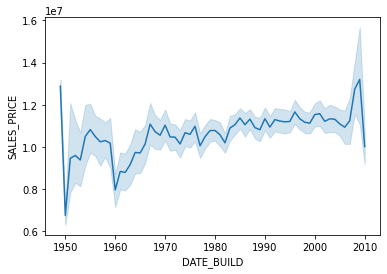

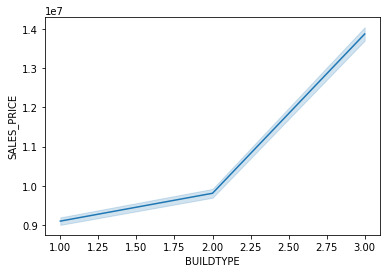

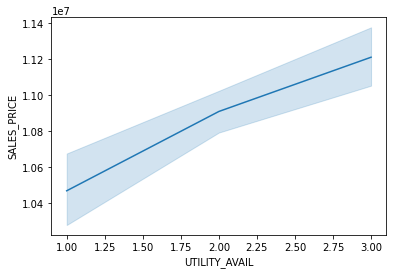

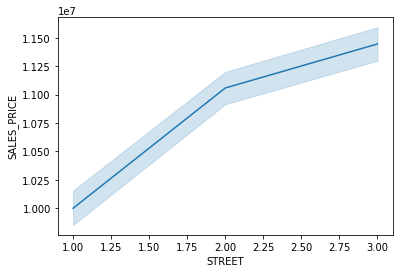

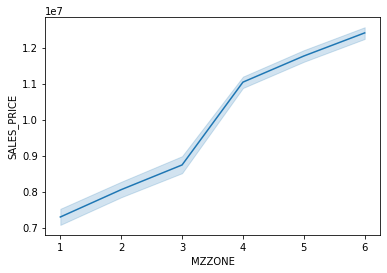

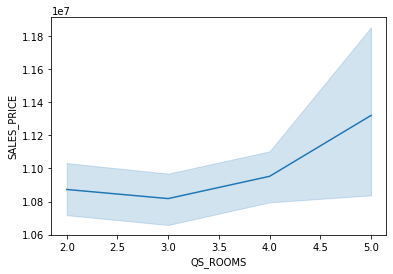

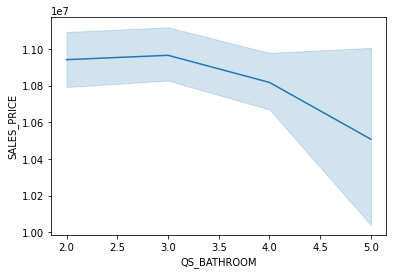

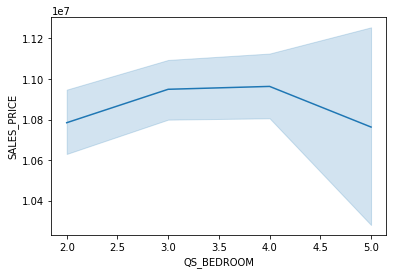

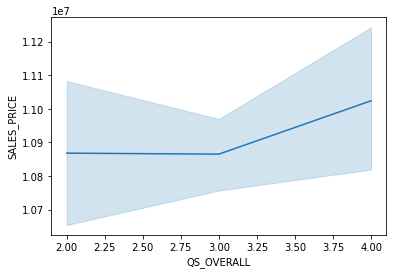

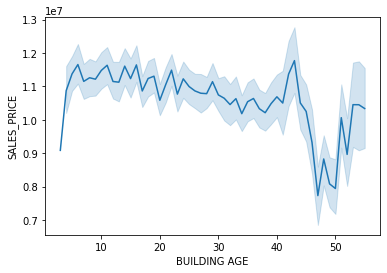

In [ ]:
for i in df.columns:
  sns.lineplot(x=df[i],y=sales_price,data=df)
  plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, sales_price, random_state=42, test_size=.33)

In [ ]:
from sklearn import linear_model
from sklearn import ensemble

In [ ]:
lr = linear_model.LinearRegression()

In [ ]:
model = lr.fit(X_train, y_train)

In [ ]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8792631086055753


In [ ]:
predictions = model.predict(X_test)

Text(0.5, 1.0, 'Linear Regression Model')

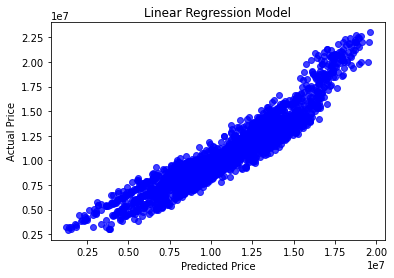

In [ ]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

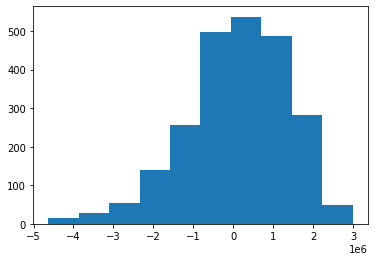

In [ ]:
loss=predictions-actual_values
plt.hist(loss)
plt.show()

In [ ]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,learning_rate = 0.1)

In [ ]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [ ]:
clf.score(X_test,y_test)

0.9974758126229267